# kernel-based density estimation

![KDE Start1](../BayesEstimation/BayesEstimationImages/KDE_Start.JPG)

Kernel density estimation (KDE) is a non-parametric method used to estimate the probability density function of a random variable, based on the concept of histograms.This technique, which can be thought of as a histogram with adaptive bins centered on each sample, infers population characteristics from a finite data sample and is also known as the Parzen–Rosenblatt window method.

![KDE_Introduction1](../BayesEstimation/BayesEstimationImages/KDE_Density.png)

![KDE_Introduction2](../BayesEstimation/BayesEstimationImages/KDE_3D.png)

Before starting with KDE, we provide an introduction. Ali Mojahed (alimojahed0079@gmail.com), who was a student in my pattern recognition course in July 2024, helped me with this introduction. 

## Introduction of KDE (By: Ali Mojahed)

**Non-parametric Density Estimation** 

 - Histogram based density estimation
 - Parzen Windows  
    - (Estimate likelihood p(x|ωj) )
 - Nearest Neighbors Density Estimation
    - Bypass likelihood and go directly to posterior estimation P(ωj|x)

- Model the probability density function without making any assumption about its functional form.
- Any non-parametric density estimation technique has to deal with the choice of “smoothing” parameters that govern the smoothness of the estimated density.
- Discuss three types of methods based on:
 1. Histograms
 2. Parzen Windows
 3. K-nearest neighbors

<img src= "https://s32.picofile.com/file/8477418034/Statistical_Pattern_Recognition_Part1_image2.png"> </img>


#Histogram-Based  Density Estimation

- Suppose each data point x is represented by an d-dimensional feature vector $(x_{1},x_{2},…,x_{d})$.

- The histogram is obtained by dividing each $x_{i}$-axis into a number of bins **M** and approximating the density at each value of $x_{i}$ by <u>the fraction of the points that fall inside the corresponding bin. </u>

<img src= "https://s32.picofile.com/file/8477418176/Statistical_Pattern_Recognition_Part1_image3.png"> </img>

- The number of bins M (or bin size) is acting as a `smoothing` parameter.  
 - If bin width is **small** (i.e., big M), then the estimated density is **very spiky** (i.e., noisy).
 - If bin width is **large** (i.e., small M), then the true structure of the density is **smoothed out**.

- In practice, we need to find an optimal value for M that compromises between these two issues.  

<img src= "https://s32.picofile.com/file/8477418192/Statistical_Pattern_Recognition_Part1_image4.png"> </img>

##Advantages of Histogram-Based  Density Estimation

1. Once the histogram has been constructed, the data is not needed anymore (i.e., <u>memory efficient</u>)
2. Retain only info on the <u>sizes</u> and <u>locations</u> of histogram bins.
3. Histogram can be built <u>sequentially</u> ... (i.e., consider the data one at a time and then discard).



##Drawbacks of Histogram-Based  Density Estimation

1. The estimated density is <u>not smooth</u> and has <u>discontinuities</u> at the boundaries of the histogram bins.
2. The final shape of the density estimate depends on the starting position of the bins.
3. the number of bins grows exponentially with the number of dimensions (If we divide each variable in M intervals, we will end up with $M^d$ bins).
4. A <u>huge</u> number of examples would be required to obtain good estimates (i.e., otherwise, most bins would be empty and the density will be approximated by zero).

<br> `All these drawbacks make the histogram unsuitable for most practical applications except for rapid visualization of results in one or two dimensions. `

#Non-Parametric Density Estimation (general formulation)

- Nonparametric techniques attempt to estimate the underlying density functions from the training data
 - `Idea:` the more data in a region, the larger is the density function

 <img src= "https://s32.picofile.com/file/8477429542/Statistical_Pattern_Recognition_Part1_image5.png"> </img>

- How can we approximate $Pr[x \in R_{1}]$ and $Pr[x \in R_{2}]$?
 - $Pr[x \in R_{1}] \approx \frac {6}{20}, Pr[x \in R_{2}] \approx \frac {6}{20}$
- Should the density curves above $R_{1}$ and $R{2}$ be equally high?
 - No, since $R_{1}$ is smaller than $R_{2}$.
 - To get density, normalize by region size:
  <img src= "https://s32.picofile.com/file/8477430326/Statistical_Pattern_Recognition_Part1_image6.png"> </img>

We thank Ali Mojahed for his contributions to the introduction.

**Ali Mojahed End**

## Main problem

Calculate probability of presence of $ k $ samples in a region with volume $ V $:

$$
p(x) \approx \frac{k/n}{V}
$$

![probability of presence](../BayesEstimation/BayesEstimationImages/kde_volume_v.png)

The above figure show:
- A 2D space with $ n $ total samples.
- A region with volume $ V $ (e.g., a circle or square) centered around a point $ x $.
- The $ k $ samples within this region.
- The concept of density estimation using these $ k $ samples.

It can be proven using the binomial distribution to relate the volume $ V $, the probability of a point falling within $ V $, and the observed data.


## Proof Using Binomial Distribution

### Step 1: Binomial Distribution Setup

Consider a dataset with $ n $ independent and identically distributed (i.i.d.) points drawn from some unknown probability density function (PDF) $ p(x) $. We want to estimate $ p(x) $ at a point $ x $.

Let $ V $ be a small volume around $ x $. The probability $ P $ that any given point falls within $ V $ is:

$$
P = \int_V p(x') \, dx'
$$

Since $ V $ is small and $ p(x) $ is approximately constant within $ V $, we can approximate this as:

$$
P \approx p(x) \cdot V
$$

### Step 2: Number of Points in Volume $ V $

Let $ k $ be the number of points that fall within the volume $ V $. Since each point independently falls within $ V $ with probability $ P $, the number of points $ k $ in $ V $ follows a binomial distribution:

$$
k \sim \text{Binomial}(n, P)
$$

The binomial probability mass function is given by:

$$
P(k) = \binom{n}{k} P^k (1-P)^{n-k}
$$

### Step 3: Expected Value of $ k $

The expected value $ E[k] $ of the binomial random variable $ k $ is:

$$
E[k] = nP
$$

Substituting $ P \approx p(x) \cdot V $:

$$
E[k] \approx n \cdot p(x) \cdot V
$$

### Step 4: Density Estimation

We want to estimate $ p(x) $. From the expected value of $ k $, we can solve for $ p(x) $:

$$
p(x) \approx \frac{E[k]}{n \cdot V}
$$

### Step 5: Approximation Using Observed $ k $

In practice, we do not know the exact expected value $ E[k] $, but we can use the observed value of $ k $ as an estimate. Thus, we approximate $ p(x) $ by:

$$
p(x) \approx \frac{k}{n \cdot V}
$$

where:
- $ k $ is the observed number of points within the volume $ V $.
- $ n $ is the total number of points.
- $ V $ is the volume around the point $ x $.

## KDE aspects

How to Choose the Optimum Values for V and k?

$$
p(x) \approx \frac{k/n}{V}
$$

- Two leading approaches:
  1. Fix the volume $ V $ and determine $ k $ from the data (kernel-based density estimation methods - Parzen Window)
  
  2. Fix the value of $ k $ and determine the corresponding volume $ V $ from the data (k-nearest neighbor method)

  ![KNN1](../BayesEstimation/BayesEstimationImages/KNN1.png)
  
In the above figure, the black rectangle includes 10 samples with volume $ V $, so $ p(x) \approx \frac{k/n}{V} $ is obtained with $ k $ fixed and $ V $ variable. Therefore, for each point, $ V $ must be adjusted to include 10 samples; this method is KDE. However, in KNN, as shown in the figure with the red rectangle, the volume ($ V $) is fixed, and $ k $ is counted for each point.

## Kernel Density Estimation (KDE): Parzen Windows

**Problem:** Given a vector $ x $, estimate $ p(x) $.

- Assume $ R_{n} $ to be a hypercube with sides of length $ h_{n} $, centered on the point $ x $:

  $ V_{n} = h_{n}^{d} $

  $ p(x) \approx \frac{k_{n}/n}{V_{n}} $

- To find an expression for $ k_n $ (i.e., the number of points in the hypercube), We introduce kernel function. The kernel function $ \varphi $ is a symmetric, non-negative function that integrates to one. Common choices include:


### Mathematical Formulations:

- **Gaussian Kernel**:
  $ \varphi(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}u^2} $

- **Epanechnikov Kernel**:
  $\varphi(u) = \frac{3}{4}(1 - u^2) \quad \text{for} \quad |u| \leq 1 $

- **Uniform Kernel**:
  $\varphi(u) = \frac{1}{2} \quad \text{for} \quad |u| \leq 1 $

- **Triweight Kernel**:
  $\varphi(u) = \frac{35}{32}(1 - u^2)^3 \quad \text{for} \quad |u| \leq 1 $

- **Tricube Kernel**:
  $\varphi(u) = \frac{70}{81}(1 - |u|^3)^3 \quad \text{for} \quad |u| \leq 1 $

- **Biweight Kernel**:
  $\varphi(u) = \frac{15}{16}(1 - u^2)^2 \quad \text{for} \quad |u| \leq 1 $

- **Cosine Kernel**:
  $\varphi(u) = \frac{\pi}{4} \cos\left(\frac{\pi}{2} u\right) \quad \text{for} \quad |u| \leq 1 $

- **Logistic Kernel**:
  $\varphi(u) = \frac{1}{\exp(u) + 2 + \exp(-u)} $

- **Sigmoid Kernel**:
  $\varphi(u) = \frac{2}{\pi (\exp(u) + \exp(-u))} $

- **Silverman Kernel**:
  $\varphi(u) = 0.5 \exp\left(-\frac{|u|}{\sqrt{2}}\right) \sin\left(\frac{|u|}{\sqrt{2}} + \frac{\pi}{4}\right) $

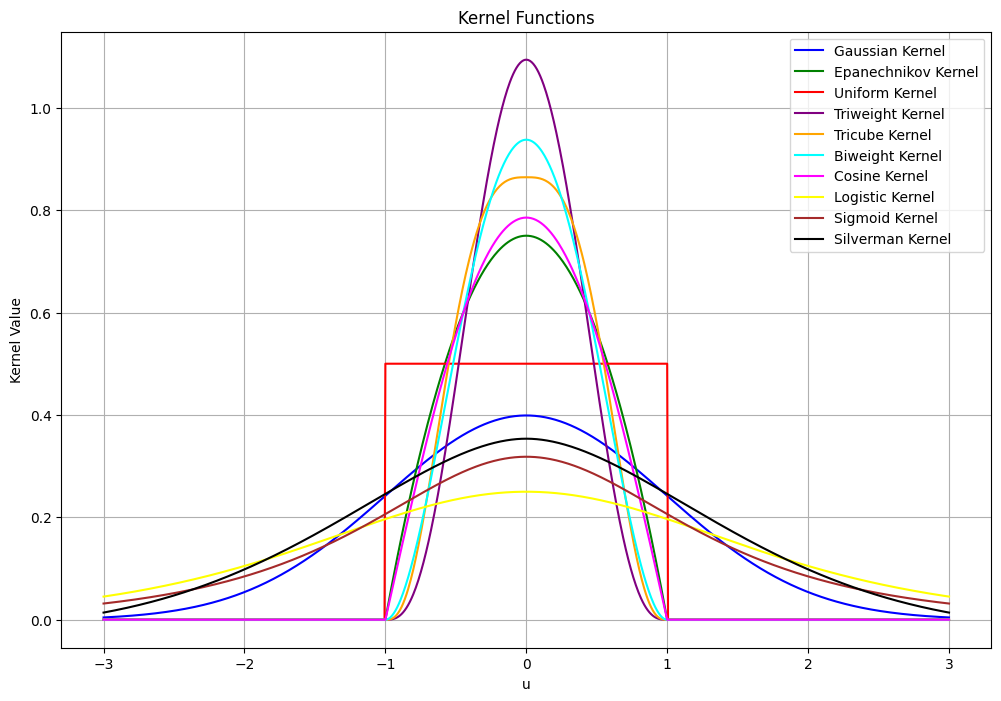

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the kernel functions with their mathematical formulations
def gaussian_kernel(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)  # Gaussian Kernel: \varphi(u) = (1/sqrt(2*pi)) * exp(-0.5*u^2)

def epanechnikov_kernel(u):
    return 0.75 * (1 - u**2) * (np.abs(u) <= 1)  # Epanechnikov Kernel: K(u) = 0.75 * (1 - u^2) for |u| <= 1

def uniform_kernel(u):
    return 0.5 * (np.abs(u) <= 1)  # Uniform Kernel: K(u) = 0.5 for |u| <= 1

def triweight_kernel(u):
    return (35/32) * (1 - u**2)**3 * (np.abs(u) <= 1)  # Triweight Kernel: K(u) = (35/32) * (1 - u^2)^3 for |u| <= 1

def tricube_kernel(u):
    return (70/81) * (1 - np.abs(u)**3)**3 * (np.abs(u) <= 1)  # Tricube Kernel: K(u) = (70/81) * (1 - |u|^3)^3 for |u| <= 1

def biweight_kernel(u):
    return (15/16) * (1 - u**2)**2 * (np.abs(u) <= 1)  # Biweight Kernel: K(u) = (15/16) * (1 - u^2)^2 for |u| <= 1

def cosine_kernel(u):
    return (np.pi/4) * np.cos((np.pi/2) * u) * (np.abs(u) <= 1)  # Cosine Kernel: K(u) = (pi/4) * cos((pi/2)*u) for |u| <= 1

def logistic_kernel(u):
    return 1 / (np.exp(u) + 2 + np.exp(-u))  # Logistic Kernel: K(u) = 1 / (exp(u) + 2 + exp(-u))

def sigmoid_kernel(u):
    return 2 / (np.pi * (np.exp(u) + np.exp(-u)))  # Sigmoid Kernel: K(u) = 2 / (pi * (exp(u) + exp(-u)))

def silverman_kernel(u):
    return 0.5 * np.exp(-np.abs(u)/np.sqrt(2)) * np.sin(np.abs(u)/np.sqrt(2) + np.pi/4)  # Silverman Kernel: K(u) = 0.5 * exp(-|u|/sqrt(2)) * sin(|u|/sqrt(2) + pi/4)

# Define the range for u
u = np.linspace(-3, 3, 1000)

# Compute the kernel values
gaussian_values = gaussian_kernel(u)
epanechnikov_values = epanechnikov_kernel(u)
uniform_values = uniform_kernel(u)
triweight_values = triweight_kernel(u)
tricube_values = tricube_kernel(u)
biweight_values = biweight_kernel(u)
cosine_values = cosine_kernel(u)
logistic_values = logistic_kernel(u)
sigmoid_values = sigmoid_kernel(u)
silverman_values = silverman_kernel(u)

# Plot the kernel functions
plt.figure(figsize=(12, 8))
plt.plot(u, gaussian_values, label='Gaussian Kernel', color='blue')
plt.plot(u, epanechnikov_values, label='Epanechnikov Kernel', color='green')
plt.plot(u, uniform_values, label='Uniform Kernel', color='red')
plt.plot(u, triweight_values, label='Triweight Kernel', color='purple')
plt.plot(u, tricube_values, label='Tricube Kernel', color='orange')
plt.plot(u, biweight_values, label='Biweight Kernel', color='cyan')
plt.plot(u, cosine_values, label='Cosine Kernel', color='magenta')
plt.plot(u, logistic_values, label='Logistic Kernel', color='yellow')
plt.plot(u, sigmoid_values, label='Sigmoid Kernel', color='brown')
plt.plot(u, silverman_values, label='Silverman Kernel', color='black')

plt.xlabel('u')
plt.ylabel('Kernel Value')
plt.legend()
plt.title('Kernel Functions')
plt.grid(True)
plt.show()


To estimate the density at point $ x $, simply center the region $ R $ at $ x $, count the number of samples in $ R $, and substitute result in our formula.

![Region1](../BayesEstimation/BayesEstimationImages/Region1.png)

![Region2](../BayesEstimation/BayesEstimationImages/Region2.png)


$$
p(x) \approx \frac{3/6}{10}
$$

In the Parzen-window approach to estimate densities, we fix the size and shape of region $ R $. 
Let us assume that the region $ R $ is a $ d $-dimensional hypercube with side length $ h $, thus its volume is $ h^{d} $ (see above figure).
Let $ u = [u_{1}, u_{2}, \ldots, u_{d}] $ and define a window function:
**Uniform Kernel**:
Here's the corrected formula with proper formatting:

$$
\varphi(u) = \begin{cases} 
\frac{1}{2} & \text{for } |u| \leq 1 \\
0 & \text{elsewhere}
\end{cases}
$$

or 

$$
\varphi(u) = \begin{cases} 
1 & \text{for } |u| \leq \frac{1}{2} \\
0 & \text{elsewhere}
\end{cases}
$$

This kernel, which corresponds to a unit hypercube centered at the origin, is known as a `Parzen window` or the `naïve estimator`.

###  Vectorian form
Recall we have $ d $-dimensional samples $ x_{1}, x_{2}, \ldots, x_{n} $. Let $ x_{ij} $ be the $ j $-th coordinate of sample $ x_{i} $, then:

$$
\varphi(u) =\begin{cases}
\frac{1}{2^d} & \text{for } \|u\|_\infty \leq 1 \\
0 & \text{otherwise}
\end{cases} 
$$

$ \|u\|_\infty $ represents the $ L_\infty $ norm (or Chebyshev norm) of the vector $ u $, which is the maximum absolute value among the components of $ u $.

$ \|u\|_\infty = \max_{j} |u_j| $

**How do we count** the total number of sample points $ x_{1}, x_{2}, \ldots, x_{n} $ which are inside the hypercube with side $ h $ and centered at $ x $?

$$
k = \sum_{i=1}^{n} \varphi \left( \frac{x - x_{i}}{h} \right)
$$

Recall $ p(x) \approx \frac{k/n}{V} $, $ V = h^{d} $.

Thus we get the desired analytical expression for the estimate of density $ p_{\varphi}(x) $:
The total number of points $ x_{i} $ falling inside the hypercube is:

$$
k_{n} = \sum_{i=1}^{n} \varphi \left( \frac{x - x_{i}}{h_{n}} \right)
$$

$\varphi \left( \frac{x - x_{i}}{h_{n}} \right) $ equals 1 if $ x_{i} $ falls within the hypercube centered at $ x $.
Then, the estimate

$$
p_{\varphi}(x) \approx \frac{k_{n}/n}{V_{n}}
$$

becomes

$$ p_{\varphi}(x) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{V_{n}} \varphi \left( \frac{x - x_{i}}{h_{n}} \right) $$

The density estimate is a superposition of kernel functions and the samples $ x_{i} $.

$$
p_{\varphi}(x) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{V_{n}} \varphi \left( \frac{x - x_{i}}{h_{n}} \right)
$$

***Notes:***
- $ \varphi(u) $ interpolates the density between samples.

- Each sample $ x_{i} $ contributes to the estimate based on its distance from $ x $.

> Notice that the Parzen window density estimate resembles the histogram, with the exception that the bin locations are determined by the data points.

_Example:_
Consider some dummy data to see how we can expand the method to multiple points.
For the One data point, we simply use:
$ \varphi \left( \frac{x - x_{1}}{h} \right) $ and for $ n $ samples:

$$
p_{\varphi}(x) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{V_{n}} \varphi \left( \frac{x - x_{i}}{h_{n}} \right)
$$

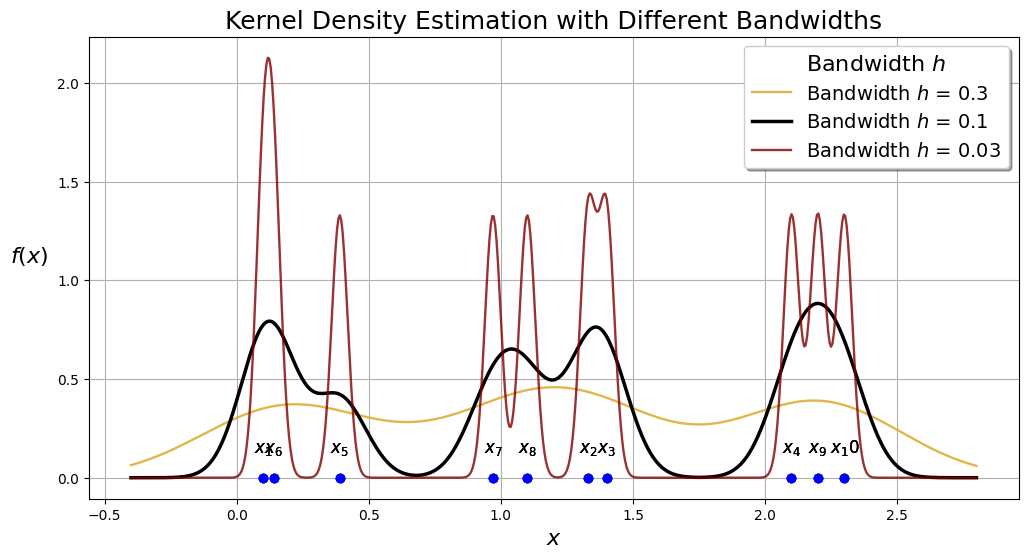

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Kernel function (Gaussian Kernel)
def K(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# New dataset with more variation to show fast changes in PDF
dataset = np.array([0.1, 1.33, 1.4, 2.1, 0.39, 0.14, 0.97, 1.1, 2.2, 2.3])

# x-value range for plotting KDEs
x_range = np.linspace(dataset.min() - 0.5, dataset.max() + 0.5, num=600)

# Bandwidth values for experimentation
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# Line properties for different bandwidth values
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7, 2.5, 1.7]

plt.figure(figsize=(12, 6))

# Iterate over bandwidth values
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = 0
    # Iterate over data points
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)
        plt.annotate(r'$x_{}$'.format(i + 1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=12,
                    )
    y_range = total_sum / (h * n_samples)
    plt.plot(x_range, y_range, 
             color=color, alpha=alpha, linewidth=width, 
             label=f'Bandwidth $h$ = {h}')

    plt.plot(dataset, np.zeros_like(dataset), 'o', 
             markersize=6, color='blue')
    
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16, rotation='horizontal', labelpad=20)
plt.legend(fontsize=14, shadow=True, title='Bandwidth $h$', title_fontsize=16)
plt.title('Kernel Density Estimation with Different Bandwidths', fontsize=18)
plt.grid(True)
plt.show()


### Effect of Bandwidth in Kernel Density Estimation (KDE)

The bandwidth (as shown in the above example) in Kernel Density Estimation (KDE) plays a crucial role in determining the smoothness and accuracy of the estimated probability density function. 

**Bandwidth values affect the KDE:**

1. **Large Bandwidth (High $ h $)**:
   - **Smoothness**: A larger bandwidth results in a smoother density estimate. This is because the kernel function spreads out over a wider range of values, averaging out more data points and reducing the influence of each individual point.
   - **Bias**: With a higher $ h $, the estimate can become overly smooth, potentially missing important features of the data distribution, such as peaks or valleys. This introduces a bias in the estimate, meaning the estimated density may deviate systematically from the true density.
   - **Variance**: The variance of the estimate decreases with a larger $ h $. This is because the larger smoothing reduces the impact of random fluctuations in the data.

2. **Small Bandwidth (Low $ h $)**:
   - **Smoothness**: A smaller bandwidth leads to a less smooth density estimate. The kernel function is more localized, closely following the data points and capturing more detailed features of the distribution.
   - **Bias**: With a lower $ h $, the estimate is less biased, meaning it can capture the true shape of the data distribution more accurately. However, this is true only if the sample size is sufficiently large.
   - **Variance**: The variance of the estimate increases with a smaller $ h $. This is because the estimate becomes more sensitive to random fluctuations in the data, leading to a more jagged and less reliable density estimate.

## Mean of $ p_{\varphi}(x)$
$ E \left\{p_{\varphi}(x)\right\}=
E \left\{ \frac{1}{n} \sum_{i=1}^{n} \frac{1}{V_n} \varphi \left( \frac{x - x_i}{h_n} \right) \right\} $

Since the expectation operator $ E \{ \cdot \} $ is a linear operator, it can be distributed over the sum. Thus:

$ E \left\{p_{\varphi}(x)\right\}=
E \left\{ \frac{1}{n} \sum_{i=1}^{n} \frac{1}{V_n} \varphi \left( \frac{x - x_i}{h_n} \right) \right\} = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{V_n} E \left\{ \varphi \left( \frac{x - x_i}{h_n} \right) \right\} $

$ E \left\{ \varphi \left( \frac{x - x_i}{h_n} \right) \right\} $ is constant relative summation index so, 

$ E \left\{p_{\varphi}(x)\right\}=
\frac{1}{V_n} E \left\{ \varphi \left( \frac{x - x_i}{h_n} \right) \right\}
$

Assuming $ x_i $ are i.i.d. samples from a true distribution $ p(x) $, the random variable $ x_i $ has the same distribution as $ x $. Therefore:

$ E \left\{ \varphi \left( \frac{x - x_i}{h_n} \right) \right\} = \int_{-\infty}^{\infty} \varphi \left( \frac{x - y}{h_n} \right) p(y) \, dy $

To simplify, let $ z = \frac{x - y}{h_n} $, hence $ dy = -h_n \, dz $:

$ E \left\{ \varphi \left( \frac{x - x_i}{h_n} \right) \right\} = \int_{-\infty}^{\infty} \varphi(z) p(x - h_n z) \, h_n \, dz $

Thus,

$$
E \left\{p_{\varphi}(x)\right\}=
\int_{-\infty}^{\infty} \varphi(z) p(x - h_n z) \, h_n \, dz
$$

$$
E \left\{p_{\varphi}(x)\right\}
= \varphi(x) * p(x)
$$


We can see that the expectation of the estimated density $ P_\varphi(x) $ is a convolution of the true density $ P(x) $ with the kernel function.

- The bandwidth $ h $ of the kernel plays the role of a smoothing parameter: the wider the kernel function, the smoother the estimate $ P_\varphi(x) $.

- For $ h \rightarrow 0 $, the kernel approaches a Dirac delta function and $ P_\varphi(x) $ approaches the true density.

- However, in practice, we have a finite number of points, so $ h $ cannot be made arbitrarily small, since the density estimate $ P_\varphi(x) $ would then degenerate to a set of impulses located at the training data points.

## Parzen Windows with Example 

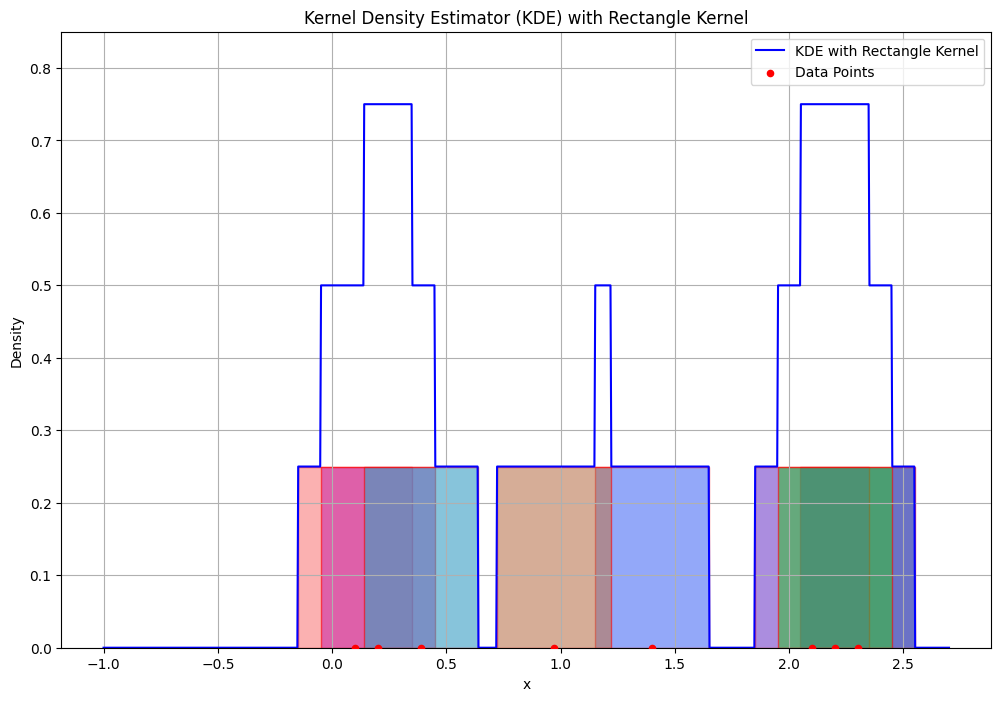

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the rectangle kernel (Parzen window)
def rectangle_kernel(u):
    return np.where(np.abs(u) <= 0.5, 1, 0)

# Kernel Density Estimator (KDE) function
def kde(x, data, bandwidth):
    n = len(data)
    kde_values = np.zeros_like(x)
    for xi in data:
        kde_values += rectangle_kernel((x - xi) / bandwidth)
    kde_values /= (n * bandwidth)
    return kde_values

# Generate sample data
data = np.array([0.1, 0.2, 2.3, 1.4, 2.1, 0.39, 0.97, 2.2]) # Adjusted sample data

# Define the bandwidth and range for x
bandwidth = 0.5
x = np.linspace(-1, 2.7, 1000)

# Compute the KDE
kde_estimate = kde(x, data, bandwidth)

# Plot the KDE and the histogram with data points
plt.figure(figsize=(12, 8))

# Add rectangles of equal height over each data point
height = 1 / (len(data) * bandwidth)  # Equal height for each rectangle
for xi in data:
    rect = patches.Rectangle((xi - bandwidth / 2, 0), bandwidth, height, 
                             linewidth=1, edgecolor='r', facecolor=np.random.rand(3,), alpha=0.6)
    plt.gca().add_patch(rect)

# Plot the KDE
plt.plot(x, kde_estimate, label='KDE with Rectangle Kernel', color='blue')

# Scatter plot of the data points
plt.scatter(data, np.zeros_like(data), color='red', label='Data Points', s=20, zorder=5)

# Adjust the y-axis limit to make sure rectangles are visible
plt.ylim(0, max(kde_estimate) + 0.1)

plt.title('Kernel Density Estimator (KDE) with Rectangle Kernel')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


## KDE Example with gaussian kernel

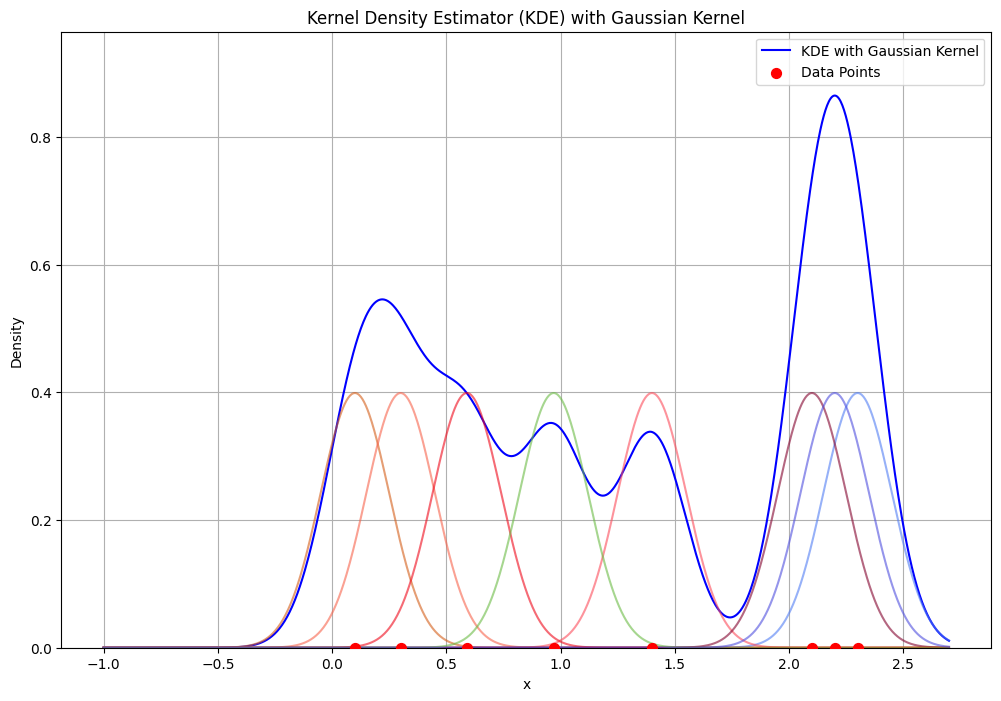

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the Gaussian kernel
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u ** 2)

# Kernel Density Estimator (KDE) function
def kde(x, data, bandwidth):
    n = len(data)
    kde_values = np.zeros_like(x)
    for xi in data:
        kde_values += gaussian_kernel((x - xi) / bandwidth)
    kde_values /= (n * bandwidth)
    return kde_values

# Generate sample data
data = np.array([0.1, 0.3, 2.3, 1.4, 2.1, 0.59, 0.97, 2.2]) # Sample data

# Define the bandwidth and range for x
bandwidth = 0.15
x = np.linspace(-1, 2.7, 1000)

# Compute the KDE
kde_estimate = kde(x, data, bandwidth)

# Plot the KDE with Gaussian Kernel and data points
plt.figure(figsize=(12, 8))
plt.plot(x, kde_estimate, label='KDE with Gaussian Kernel', color='blue')

# Add Gaussian curves over each data point
x_gaussian = np.linspace(-1, 2.7, 1000)  # Range for Gaussian curves
for xi in data:
    gaussian_curve = gaussian_kernel((x_gaussian - xi) / bandwidth)
    plt.plot(x_gaussian, gaussian_curve, color=np.random.rand(3,), alpha=0.6)

# Scatter plot of the data points
plt.scatter(data, np.zeros_like(data), color='red', label='Data Points', s=50, zorder=5)

# Adjust the y-axis limit to make sure Gaussian curves are visible
plt.ylim(0, max(kde_estimate) + 0.1)

plt.title('Kernel Density Estimator (KDE) with Gaussian Kernel')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
